<h1>Question 1</h1>

In [297]:
TP = 355
FP = 1480
TN = 120
FN = 45
precision = TP / (TP + FP)
recall = TP / (TP + FN)

f1_score = 2 * ((precision *recall) / (precision + recall))
f1_score = round(f1_score, 4)
f1_score

0.3177

<h1>Question 4</h1>

In [298]:
TN_ = [0.99, 0.91, 0.96, 0.98]
FP_ = [0.01, 0.09, 0.04, 0.02]
FN_ = [0.21, 0.22, 0.10, 0.18]
TP_ = [0.79, 0.78, 0.90, 0.82]


for i in TP_:
    for j in FN_:
        recall_ = round(i / (i + j), 2)
        if recall_ > 0.80:
            if TP_.index(i) == FN_.index(j):
                print(f'TP={i * 100}, FN={j * 100}, recall={recall_}')


TP=90.0, FN=10.0, recall=0.9
TP=82.0, FN=18.0, recall=0.82


<h2>Importing Dependencies</h2>

In [299]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Stratified K-Fold cross validation ensures that in every fold, there is an equal proportion of each...
#...target class to obtain a good representation of the data and avoid imbalance and biased results

<h5>Reading the Data</h5>

In [339]:
df = pd.read_csv('c:\\Users\\kenne\\Downloads\\Data_for_UCI_named.csv')

print('Data read successfully!')
df.head()

Data read successfully!


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [340]:
df.shape

(10000, 14)

In [341]:
df.describe(include='all')

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unstable
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6380
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731,NaN
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919,NaN
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760,NaN
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557,NaN
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142,NaN
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878,NaN


In [342]:
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [343]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

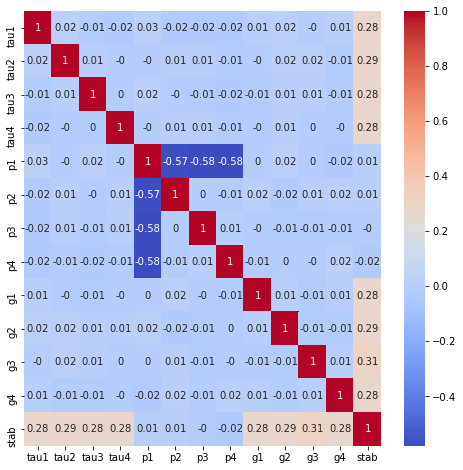

In [344]:
plt.figure(figsize=(8, 8))
sns.heatmap(round(df.corr(), 2), cmap='coolwarm', annot=True)

plt.show()

In [345]:
#Drop the 'stab' column
try:
    df = df.drop('stab', axis=1)
    display(df.head())
except KeyError as error:
    print(error)
    display(df.head())

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


<h3>Splitting into Features (X) and Target (y)</h3>

In [346]:
X = df.drop('stabf', axis=1)
y = df.stabf

In [348]:
#Check for imbalance in target
from collections import Counter
print(Counter(y))

Counter({'unstable': 6380, 'stable': 3620})


<h3>Encoding the Target</h3>

In [352]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(Counter(y))

Counter({1: 6380, 0: 3620})


<h3>Splitting the dataset into the Training and Test Set</h3>

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<h3>Scalling the Training Features and Test Features</h3>

In [355]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = False

In [356]:
if not scaled:
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)
    scaled = True
else:
    print('Features have been scaled')

<h2>Training the Random Forest model</h2>

In [357]:
from sklearn.ensemble import RandomForestClassifier

rfclassifer = RandomForestClassifier(random_state=1)
rfclassifer.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [361]:
y_pred = rfclassifer.predict(X_test)
y_pred.shape

(2000,)

In [364]:
pd.concat([pd.Series(y_pred), pd.Series(y_test)], axis=1, keys=['Predicted Values', 'Actual Values'])

,Predicted Values,Actual Values
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
1995,0,0
1996,0,0
1997,0,0
1998,0,1


<h3>Evaluating the performance of the Random Forest Model</h3>

In [369]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
acc_ = accuracy_score(y_true=y_test, y_pred=y_pred)
precision_ = precision_score(y_true=y_test, y_pred=y_pred)
recall_ = recall_score(y_true=y_test, y_pred=y_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

print(f'Accuracy={round(acc_, 4)} | Precision={round(precision_, 4)} | Recall={round(recall_, 4)}')
print(cm)

Accuracy=0.9285 | Precision=0.9334 | Recall=0.9573
[[ 624   88]
 [  55 1233]]


<h2>Training the Extra Trees Model</h2>

In [381]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

etclassifer = ExtraTreesClassifier(random_state=1)

para = (n_estimators=[50, 100, 300, 500, 1_000], min_impurity_split=[2, 3, 5, 7, 9],
                                   min_samples_leaf=[1, 2, 4, 6, 8], max_features=['auto', 'sqrt', 'log2', None],
GridSearchCV

ValueError: n_estimators must be an integer, got <class 'list'>.

<h3>Evaluating the performance of the Extra Trees Model</h3>

In [379]:
from xgboost import XGBClassifier
xgbclassifer = XGBClassifier(random_state=1)

